In [21]:
import sys
print(sys.version_info)

from pandas import DataFrame, read_csv
import numpy as np

import matplotlib
matplotlib.use('nbagg')

import matplotlib.pyplot as plt

%matplotlib inline

sys.version_info(major=3, minor=10, micro=4, releaselevel='final', serial=0)


In [7]:
# Download data 

In [8]:
# Load data into a data frame
#data = read_csv('./vadrup/subdaily/produkt_n_termin_19891001_20211231_01766.txt');
data = read_csv('./vadrup/daily/produkt_st_tag_19770101_20011231_03815.txt',sep=';',header=0);

In [37]:
# Extract the mean sun light given the month of the year
data

,STATIONS_ID,MESS_DATUM,QN_592,ATMO_STRAHL,FD_STRAHL,FG_STRAHL,SD_STRAHL,eor
0,3815,19770101,1,-999,-999.0,NaN,0.0,eor
1,3815,19770102,1,-999,-999.0,NaN,0.0,eor
2,3815,19770103,1,-999,-999.0,NaN,0.0,eor
3,3815,19770104,1,-999,-999.0,NaN,0.0,eor
4,3815,19770105,1,-999,-999.0,NaN,0.0,eor
...,...,...,...,...,...,...,...,...
9095,3815,20011227,1,-999,-999.0,NaN,-999.0,eor
9096,3815,20011228,1,-999,-999.0,NaN,-999.0,eor
9097,3815,20011229,1,-999,-999.0,NaN,-999.0,eor
9098,3815,20011230,1,-999,-999.0,NaN,-999.0,eor


In [33]:
data.loc[data["FG_STRAHL"]<0.001, "FG_STRAHL"] = float('NaN')

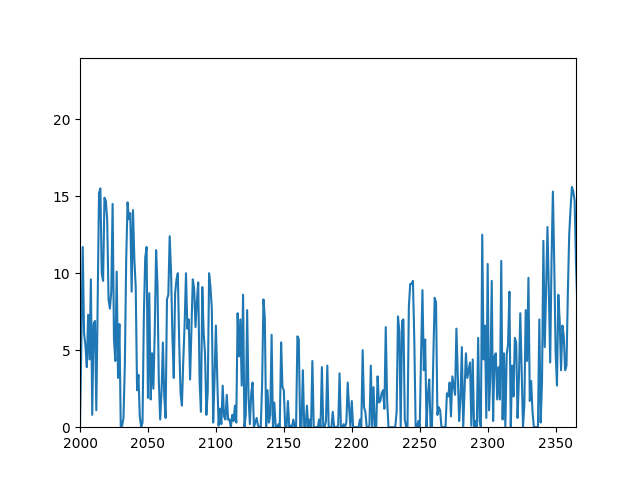

In [10]:
%matplotlib widget
#plt.plot(range(0,9100),data['FG_STRAHL'])
plt.plot(range(0,9100),data['SD_STRAHL'])
# FG units J/cm^2 direct irradiation between 0.3um and 4um
# FD 
# SD units hours/day
#
plt.xlim([2000,2365])
plt.ylim([0,24])
plt.show();


In [6]:
type(data)


pandas.core.frame.DataFrame

In [32]:
np.log2(float('NaN'))

nan

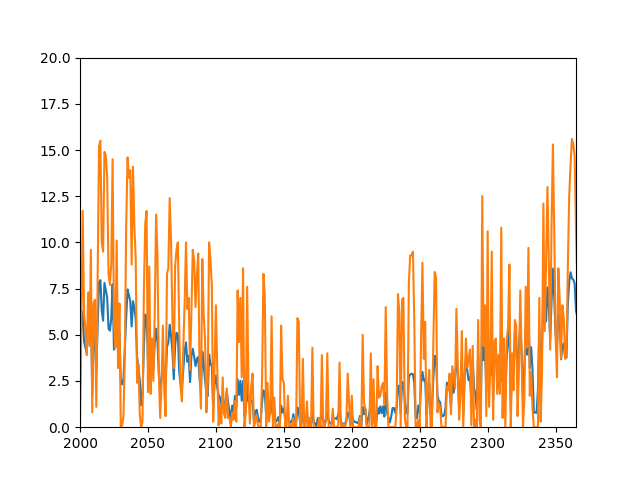

In [38]:
%matplotlib widget
unitConversion = 0.0027777777
#plt.plot(range(0,9100),np.log2((data['FG_STRAHL'] * unitConversion).to_numpy()))
plt.plot(range(0,9100),(data['FG_STRAHL'] * unitConversion).to_numpy())
plt.plot(range(0,9100),data['SD_STRAHL'])
# FG units J/cm^2 direct irradiation between 0.3um and 4um
# FD 
# SD units hours/day
#
plt.xlim([2000,2365])
plt.ylim([0,20])
plt.show();


In [29]:

type(np.log2((data['FG_STRAHL'] * unitConversion).to_numpy()))


/tmp/ipykernel_12775/1724444645.py:1: RuntimeWarning: invalid value encountered in log2
  type(np.log2((data['FG_STRAHL'] * unitConversion).to_numpy()))


numpy.ndarray

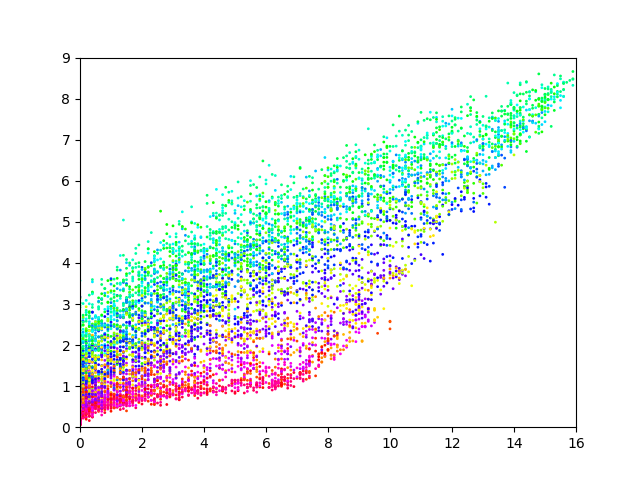

In [51]:
%matplotlib widget
unitConversion = 0.0027777777
plt.hsv()
#plt.plot(range(0,9100),np.log2((data['FG_STRAHL'] * unitConversion).to_numpy()))
plt.scatter(data['SD_STRAHL'],(data['FG_STRAHL'] * unitConversion), s=1, c=np.mod(range(0,9100),365))
# FG units J/cm^2 direct irradiation between 0.3um and 4um
# FD 
# SD units hours/day
#
plt.marker_size = 1
plt.xlim([0,16])
plt.ylim([0,9])
plt.show();
